In [91]:
print('بسم الله')

بسم الله


# GWAS using plink 
## setting up environment and downloading plink 

In [7]:
!wget -qO plink.zip "https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20201019.zip" 
!unzip -q plink.zip -d plink_folder
## downloading plink from plink official website and extracting files

In [2]:
!cp plink_folder/plink /usr/local/bin/

In [3]:
# making plink_folder/plink run as a command 
!chmod +x /usr/local/bin/plink

In [4]:
!plink --version

PLINK v1.90b6.21 64-bit (19 Oct 2020)


In [100]:
!mkdir plink2_folder

In [110]:
!wget -qO plink2.zip "https://s3.amazonaws.com/plink2-assets/alpha5/plink2_linux_amd_avx2_20250129.zip" 
!unzip -q plink2.zip -d plink2_folder

In [7]:
## downloading plink from plink official website and extracting files
!cp plink2_folder/plink2 /usr/local/bin/

In [10]:
# making plink_folder/plink run as a command 
!chmod +x /usr/local/bin/plink2

In [11]:
!plink2 --version

PLINK v2.0.0-a.5.23LM AVX2 AMD (29 Jan 2024)


In [ ]:
!git clone https://github.com/Cloufield/GWASTutorial.git

In [16]:
!unzip /kaggle/working/GWASTutorial/01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.zip -d /kaggle/working/GWASTutorial/01_Dataset/

Archive:  /kaggle/working/GWASTutorial/01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.zip
   creating: 1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing/
  inflating: 1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.bim  
  inflating: 1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.bed  
  inflating: 1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.fam  


___________________

# QC and key statistics 

In [18]:
%cd /kaggle/working/GWASTutorial
!ls 01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing

/kaggle/working/GWASTutorial
1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.bed
1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.bim
1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.fam


In [35]:
#Calculate missing rate
genotypefile ='01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing'
!plink \
    --bfile {genotypefile} \
    --missing \
    --out plink_results

In [23]:
!head plink_results.imiss

      FID       IID MISS_PHENO   N_MISS   N_GENO   F_MISS
  HG00403   HG00403          Y    10020  1235116 0.008113
  HG00404   HG00404          Y     9192  1235116 0.007442
  HG00406   HG00406          Y    15751  1235116  0.01275
  HG00407   HG00407          Y    14653  1235116  0.01186
  HG00409   HG00409          Y     5667  1235116 0.004588
  HG00410   HG00410          Y     6066  1235116 0.004911
  HG00419   HG00419          Y    20000  1235116  0.01619
  HG00421   HG00421          Y    17542  1235116   0.0142
  HG00422   HG00422          Y    18608  1235116  0.01507


In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
imissing= pd.read_csv('/kaggle/working/GWASTutorial/plink_results.imiss', sep='\s+', engine='python')
plt.hist(imissing['F_MISS'])

(array([2.24530e+05, 2.67119e+05, 4.92543e+05, 1.33893e+05, 6.92100e+04,
        4.22280e+04, 3.92300e+03, 1.55900e+03, 8.80000e+01, 2.30000e+01]),
 array([0.      , 0.002778, 0.005556, 0.008334, 0.011112, 0.01389 ,
        0.016668, 0.019446, 0.022224, 0.025002, 0.02778 ]),
 <BarContainer object of 10 artists>)

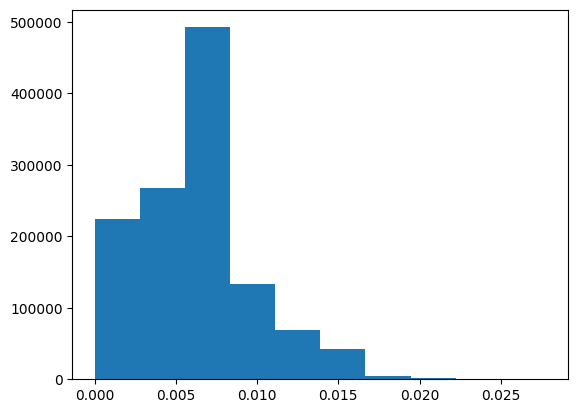

In [41]:
lmissing= pd.read_csv('/kaggle/working/GWASTutorial/plink_results.lmiss', sep='\s+', engine='python')
plt.hist(lmissing['F_MISS'])

In [13]:
# Calculate the MAF of variants
!plink \
    --bfile {genotypefile} \
    --freq \
    --out plink_results

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink_results.log.
Options in effect:
  --bfile 01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --freq
  --out plink_results

32102 MB RAM detected; reserving 16051 MB for main workspace.
1235116 variants loaded from .bim file.
504 people (0 males, 0 females, 504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 504 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993828.
--freq: Allele frequen

In [23]:
!head plink_results.frq

 CHR              SNP   A1   A2          MAF  NCHROBS
   1      1:14930:A:G    G    A       0.4133     1004
   1      1:15774:G:A    A    G      0.02794     1002
   1      1:15777:A:G    G    A      0.07385     1002
   1      1:57292:C:T    T    C       0.1054      996
   1      1:77874:G:A    A    G      0.01996     1002
   1      1:87360:C:T    T    C      0.02286     1006
   1      1:92917:T:A    A    T     0.003018      994
   1     1:104186:T:C    T    C        0.499     1002
   1     1:125271:C:T    C    T      0.03088     1004


(array([394631., 154454., 117299.,  99743.,  88622.,  82245.,  77716.,
         73498.,  74320.,  72588.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 <BarContainer object of 10 artists>)

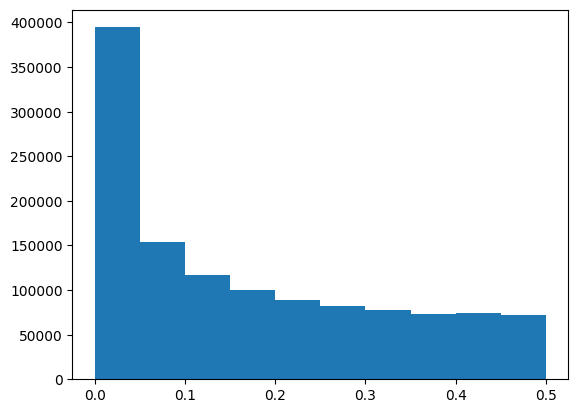

In [31]:
maf = pd.read_csv('plink_results.frq', sep= '\s+', engine= 'python')
plt.hist(maf['MAF'])

In [38]:
# Calculate the Hardy-Weinberg equilibrium exact test statistics using PLINK
!plink \
    --bfile {genotypefile} \
    --hardy \
    --out plink_results

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink_results.log.
Options in effect:
  --bfile 01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --hardy
  --out plink_results

32102 MB RAM detected; reserving 16051 MB for main workspace.
1235116 variants loaded from .bim file.
504 people (0 males, 0 females, 504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 504 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.993828.
--hardy: Writing Hard

In [39]:
!head plink_results.hwe

 CHR              SNP     TEST   A1   A2                 GENO   O(HET)   E(HET)            P 
   1      1:14930:A:G  ALL(NP)    G    A             4/407/91   0.8108    0.485    4.864e-61
   1      1:15774:G:A  ALL(NP)    A    G             0/28/473  0.05589  0.05433            1
   1      1:15777:A:G  ALL(NP)    G    A             1/72/428   0.1437   0.1368       0.5053
   1      1:57292:C:T  ALL(NP)    T    C             3/99/396   0.1988   0.1886       0.3393
   1      1:77874:G:A  ALL(NP)    A    G             0/20/481  0.03992  0.03912            1
   1      1:87360:C:T  ALL(NP)    T    C             0/23/480  0.04573  0.04468            1
   1      1:92917:T:A  ALL(NP)    A    T              0/3/494 0.006036 0.006018            1
   1     1:104186:T:C  ALL(NP)    T    C            74/352/75   0.7026      0.5    6.418e-20
   1     1:125271:C:T  ALL(NP)    C    T             1/29/472  0.05777  0.05985       0.3798


In [48]:
# applying filters 

    # --maf 0.01 :  # exlcude snps with maf<0.01
    # --geno 0.02 :  # ilters out all variants with missing rates exceeding 0.02
    # --mind 0.02 : # filters out all samples with missing rates exceeding 0.02
    # --hwe 1e-6 :  # filters out all variants which have Hardy-Weinberg equilibrium exact test p-value below 1e-6
    # --indep-pairwise 50 5 0.2 :  # LD pruning 
!plink \
    --bfile {genotypefile} \
    --maf 0.01 \
    --geno 0.02 \
    --mind 0.02 \
    --hwe 1e-6 \
    --indep-pairwise 50 5 0.2 \
    --out plink_results


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink_results.log.
Options in effect:
  --bfile 01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --geno 0.02
  --hwe 1e-6
  --indep-pairwise 50 5 0.2
  --maf 0.01
  --mind 0.02
  --out plink_results

32102 MB RAM detected; reserving 16051 MB for main workspace.
1235116 variants loaded from .bim file.
504 people (0 males, 0 females, 504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink_results.nosex .
3 people removed due to missing genotype data (--mind).
IDs written to plink_results.irem .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 501 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748

In [63]:
!head plink_results.prune.in

1:15774:G:A
1:15777:A:G
1:57292:C:T
1:77874:G:A
1:87360:C:T
1:125271:C:T
1:232449:G:A
1:533113:A:G
1:565697:A:G
1:566933:A:G


In [53]:
# Calculate inbreeding F coefficient
!plink \
    --bfile {genotypefile} \
    --extract plink_results.prune.in \
    --het \
    --out plink_results

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink_results.log.
Options in effect:
  --bfile 01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --extract plink_results.prune.in
  --het
  --out plink_results

32102 MB RAM detected; reserving 16051 MB for main workspace.
1235116 variants loaded from .bim file.
504 people (0 males, 0 females, 504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink_results.nosex .
--extract: 232105 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 504 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949

In [62]:
!head plink_results.het

      FID       IID       O(HOM)       E(HOM)        N(NM)            F
  HG00403   HG00403       191655    1.909e+05       230210      0.01845
  HG00404   HG00404       191526    1.911e+05       230421      0.01043
  HG00406   HG00406       189950    1.901e+05       229197    -0.003628
  HG00407   HG00407       190305    1.902e+05       229346     0.001887
  HG00409   HG00409       191387    1.916e+05       231019    -0.005622
  HG00410   HG00410       191217    1.916e+05       230961    -0.008635
  HG00419   HG00419       189366    1.894e+05       228363   -0.0005354
  HG00421   HG00421       189314    1.897e+05       228675    -0.008769
  HG00422   HG00422       189396    1.895e+05       228512    -0.003152


In [72]:
het= pd.read_csv('plink_results.het', sep='\s+', engine='python')
het.head()

,FID,IID,O(HOM),E(HOM),N(NM),F
0,HG00403,HG00403,191655,190900.0,230210,0.018450
1,HG00404,HG00404,191526,191100.0,230421,0.010430
2,HG00406,HG00406,189950,190100.0,229197,-0.003628
3,HG00407,HG00407,190305,190200.0,229346,0.001887
4,HG00409,HG00409,191387,191600.0,231019,-0.005622


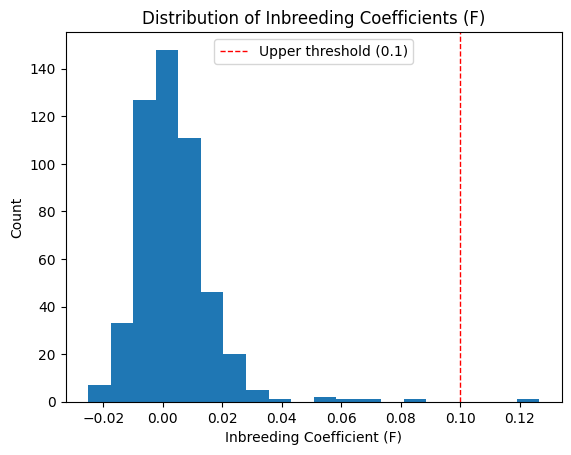

In [71]:
high_threshold= 0.1
plt.hist(het['F'], bins=20)
plt.axvline(high_threshold, color='red', linestyle='dashed', linewidth=1, label=f"Upper threshold ({high_threshold})")
plt.xlabel("Inbreeding Coefficient (F)")
plt.ylabel("Count")
plt.title("Distribution of Inbreeding Coefficients (F)")
plt.legend()

In [76]:
# Create sample list of individuals with extreme F using awk

!awk 'NR>1 && $6>0.1 || $6<-0.1 {print $1,$2}' plink_results.het > high_het.sample
!head high_het.sample 
# only one sample 

HG01816 HG01816


In [77]:
# Estimate IBD
!plink \
    --bfile {genotypefile} \
    --extract plink_results.prune.in \
    --genome \
    --out plink_results

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink_results.log.
Options in effect:
  --bfile 01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --extract plink_results.prune.in
  --genome
  --out plink_results

32102 MB RAM detected; reserving 16051 MB for main workspace.
1235116 variants loaded from .bim file.
504 people (0 males, 0 females, 504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink_results.nosex .
--extract: 232105 variants remaining.
Using up to 4 threads (change this with --threads).
Before main variant filters, 504 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495

In [81]:
!head plink_results.genome

     FID1     IID1     FID2     IID2 RT    EZ      Z0      Z1      Z2  PI_HAT PHE       DST     PPC   RATIO
  HG00403  HG00403  HG00404  HG00404 UN    NA  0.9719  0.0000  0.0281  0.0281  -1  0.861164  0.2841  1.9621
  HG00403  HG00403  HG00406  HG00406 UN    NA  0.9792  0.0070  0.0137  0.0172  -1  0.860737  0.9298  2.1022
  HG00403  HG00403  HG00407  HG00407 UN    NA  0.9794  0.0000  0.0206  0.0206  -1  0.860326  0.6848  2.0326
  HG00403  HG00403  HG00409  HG00409 UN    NA  0.9895  0.0000  0.0105  0.0105  -1  0.859598  0.2227  1.9495
  HG00403  HG00403  HG00410  HG00410 UN    NA  0.9740  0.0172  0.0088  0.0174  -1  0.860612  0.5751  2.0127
  HG00403  HG00403  HG00419  HG00419 UN    NA  1.0000  0.0000  0.0000  0.0000  -1  0.860098  0.8286  2.0649
  HG00403  HG00403  HG00421  HG00421 UN    NA  0.9775  0.0225  0.0000  0.0113  -1  0.859657  0.2835  1.9619
  HG00403  HG00403  HG00422  HG00422 UN    NA  0.9878  0.0000  0.0122  0.0122  -1  0.859647  0.8513  2.0717
  HG00403  HG00403  HG00428 

In [82]:
# extract the 1000 samples with the pruned SNPs, and make a bed file.
!plink \
    --bfile {genotypefile} \
    --extract plink_results.prune.in \
    --make-bed \
    --out plink_1000_pruned

# convert the bed/bim/fam to ped/map
!plink \
        --bfile plink_1000_pruned \
        --recode \
        --out plink_1000_pruned

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink_1000_pruned.log.
Options in effect:
  --bfile 01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --extract plink_results.prune.in
  --make-bed
  --out plink_1000_pruned

32102 MB RAM detected; reserving 16051 MB for main workspace.
1235116 variants loaded from .bim file.
504 people (0 males, 0 females, 504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink_1000_pruned.nosex .
--extract: 232105 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 504 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586

In [85]:
# now apply all filters to have a cleaned datasets in bed 
!plink \
        --bfile {genotypefile} \
        --maf 0.01 \
        --geno 0.02 \
        --mind 0.02 \
        --hwe 1e-6 \
        --remove high_het.sample \
        --keep-allele-order \
        --make-bed \
        --out sample_data.clean

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to sample_data.clean.log.
Options in effect:
  --bfile 01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --geno 0.02
  --hwe 1e-6
  --keep-allele-order
  --maf 0.01
  --make-bed
  --mind 0.02
  --out sample_data.clean
  --remove high_het.sample

32102 MB RAM detected; reserving 16051 MB for main workspace.
1235116 variants loaded from .bim file.
504 people (0 males, 0 females, 504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to sample_data.clean.nosex .
--remove: 503 people remaining.
3 people removed due to missing genotype data (--mind).
IDs written to sample_data.clean.irem .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 500 founders and 0 nonfounders present.
Calculating allele frequencies

In [10]:
!ls plink_results*

plink_results.frq     plink_results.imiss  plink_results.nosex
plink_results.genome  plink_results.irem   plink_results.prune.in
plink_results.het     plink_results.lmiss  plink_results.prune.out
plink_results.hwe     plink_results.log


In [19]:
!ls sample_data*

sample_data.clean.bed  sample_data.clean.fam   sample_data.clean.log
sample_data.clean.bim  sample_data.clean.irem  sample_data.clean.nosex


In [22]:
!mkdir -p sample_data
!mv sample_data* sample_data/

In [27]:
%cd /kaggle/working/GWASTutorial/sample_data

/kaggle/working/GWASTutorial/sample_data


# PCA


In [31]:
!ls

sample_data.clean.bed  sample_data.clean.fam   sample_data.clean.log
sample_data.clean.bim  sample_data.clean.irem  sample_data.clean.nosex


In [81]:
content = """1   48000000    52000000    highld
2   86000000    100500000   highld
2   134500000   138000000   highld
2   183000000   190000000   highld
3   47500000    50000000    highld
3   83500000    87000000    highld
3   89000000    97500000    highld
5   44500000    50500000    highld
5   98000000    100500000   highld
5   129000000   132000000   highld
5   135500000   138500000   highld
6   25000000    35000000    highld
6   57000000    64000000    highld
6   140000000   142500000   highld
7   55000000    66000000    highld
8   7000000 13000000    highld
8   43000000    50000000    highld
8   112000000   115000000   highld
10  37000000    43000000    highld
11  46000000    57000000    highld
11  87500000    90500000    highld
12  33000000    40000000    highld
12  109500000   112000000   highld
20  32000000    34500000    highld"""
with open('high-ld.txt', 'w') as file:
    file.write(content)

In [84]:
# Create a list of SNPs in the regions specified in high-ld.txt

genotypefile ='sample_data.clean'
!plink \
    --bfile {genotypefile} \
    --make-set high-ld.txt \
    --write-set \
    --out hild

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to hild.log.
Options in effect:
  --bfile sample_data.clean
  --make-set high-ld.txt
  --out hild
  --write-set

32102 MB RAM detected; reserving 16051 MB for main workspace.
1128732 variants loaded from .bim file.
500 people (0 males, 0 females, 500 ambiguous) loaded from .fam.
Ambiguous sex IDs written to hild.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 500 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.99394.
--make-set: 1 set defined.
1128732 variants and 500 people pass filters and QC.
Note: No phenotypes present.
--write-set: hild.set wr

In [89]:
!head 

highld
1:48002096:C:G
1:48002204:A:G
1:48006898:G:A
1:48008774:G:C
1:48009789:T:C
1:48015258:T:C
1:48017067:T:C
1:48018250:C:T
1:48020309:A:G


In [113]:
# LD-pruning, excluding high-LD and HLA regions
threadnum=2
!plink2 \
    --bfile {genotypefile} \
    --maf 0.01 \
    --threads {threadnum} \
    --exclude hild.set \
    --indep-pairwise 500 50 0.2 \
    --out plink_results

PLINK v2.0.0-a.5.23LM AVX2 AMD (29 Jan 2024)       cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink_results.log.
Options in effect:
  --bfile sample_data.clean
  --exclude hild.set
  --indep-pairwise 500 50 0.2
  --maf 0.01
  --out plink_results
  --threads 2

Start time: Thu Apr  3 21:19:30 2025
32102 MiB RAM detected, ~30876 available; reserving 16051 MiB for main
workspace.
Using up to 2 compute threads.
500 samples (0 females, 0 males, 500 ambiguous; 500 founders) loaded from
sample_data.clean.fam.
1128732 variants loaded from sample_data.clean.bim.
Note: No phenotype data present.
--exclude: 1084246 variants remaining.
Calculating allele frequencies... 11172329353945515763687480869298done.
0 variants removed due to allele frequency threshold(s)
(--maf/--max-maf/--mac/--max-mac).
1084246 variants remaining after main filters.
--indep-pairwise (2 compute threads): 1224364860728496887494/1084246 variants remov

In [114]:
# Remove related samples using king-cuttoff
!plink2 \
        --bfile {genotypefile} \
        --extract plink_results.prune.in \
        --king-cutoff 0.0884 \
        --threads {threadnum} \
        --out plink_results

PLINK v2.0.0-a.5.23LM AVX2 AMD (29 Jan 2024)       cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink_results.log.
Options in effect:
  --bfile sample_data.clean
  --extract plink_results.prune.in
  --king-cutoff 0.0884
  --out plink_results
  --threads 2

Start time: Thu Apr  3 21:19:42 2025
32102 MiB RAM detected, ~30832 available; reserving 16051 MiB for main
workspace.
Using up to 2 compute threads.
500 samples (0 females, 0 males, 500 ambiguous; 500 founders) loaded from
sample_data.clean.fam.
1128732 variants loaded from sample_data.clean.bim.
Note: No phenotype data present.
--extract: 196752 variants remaining.
196752 variants remaining after main filters.
--king-cutoff pass 1/1: Scanning for rare variants... 11172227333743485460667177849198done.
19178 variants handled by initial scan (177574 remaining).
--king-cutoff pass 1/1: Condensing...               done.
--king-cutoff: 196752 variants processed.
--k

In [117]:
# PCA after pruning and removing related samples
!plink2 \
        --bfile {genotypefile} \
        --keep plink_results.king.cutoff.in.id \
        --extract plink_results.prune.in \
        --freq counts \
        --threads {threadnum} \
        --pca approx allele-wts 10 \
        --out plink_results

PLINK v2.0.0-a.5.23LM AVX2 AMD (29 Jan 2024)       cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink_results.log.
Options in effect:
  --bfile sample_data.clean
  --extract plink_results.prune.in
  --freq counts
  --keep plink_results.king.cutoff.in.id
  --out plink_results
  --pca approx allele-wts 10
  --threads 2

Start time: Thu Apr  3 21:21:17 2025
32102 MiB RAM detected, ~30797 available; reserving 16051 MiB for main
workspace.
Using up to 2 compute threads.
500 samples (0 females, 0 males, 500 ambiguous; 500 founders) loaded from
sample_data.clean.fam.
1128732 variants loaded from sample_data.clean.bim.
Note: No phenotype data present.
--extract: 196752 variants remaining.
--keep: 500 samples remaining.
500 samples (0 females, 0 males, 500 ambiguous; 500 founders) remaining after
main filters.
Calculating allele frequencies... 11172227333743485460667177849198done.
--freq counts: Allele counts (founders onl

In [119]:
# Projection (related and unrelated samples)
!plink2 \
        --bfile {genotypefile} \
        --threads {threadnum} \
        --read-freq plink_results.acount \
        --score plink_results.eigenvec.allele 2 6 header-read no-mean-imputation variance-standardize \
        --score-col-nums 7-16 \
        --out plink_results_projected

PLINK v2.0.0-a.5.23LM AVX2 AMD (29 Jan 2024)       cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink_results_projected.log.
Options in effect:
  --bfile sample_data.clean
  --out plink_results_projected
  --read-freq plink_results.acount
  --score plink_results.eigenvec.allele 2 6 header-read no-mean-imputation variance-standardize
  --score-col-nums 7-16
  --threads 2

Start time: Thu Apr  3 21:22:45 2025
32102 MiB RAM detected, ~30784 available; reserving 16051 MiB for main
workspace.
Using up to 2 compute threads.
500 samples (0 females, 0 males, 500 ambiguous; 500 founders) loaded from
sample_data.clean.fam.
1128732 variants loaded from sample_data.clean.bim.
Note: No phenotype data present.
--read-freq: PLINK 2 --freq file detected.
--read-freq: Frequencies for 196752 variants loaded.
Calculating allele frequencies... 11172329354147535864707682879398done.
--score: 196752 variants processed.
--score: Results 

In [123]:
!head plink_results.eigenvec.allele

#CHROM	ID	REF	ALT	PROVISIONAL_REF?	A1	PC1	PC2	PC3	PC4	PC5	PC6	PC7	PC8	PC9	PC10
1	1:15774:G:A	G	A	Y	G	-0.57834	-1.03002	-0.744557	0.161887	-0.389286	0.0514059	0.132777	0.0335401	0.846284	-0.0561161
1	1:15774:G:A	G	A	Y	A	0.57834	1.03002	0.744557	-0.161887	0.389286	-0.0514059	-0.132777	-0.0335401	-0.846284	0.0561161
1	1:15777:A:G	A	G	Y	A	0.585215	0.401872	0.393071	1.79583	-0.89583	0.70102	-0.104294	0.694716	0.00832729	-0.515952
1	1:15777:A:G	A	G	Y	G	-0.585215	-0.401872	-0.393071	-1.79583	0.89583	-0.70102	0.104294	-0.694716	-0.00832729	0.515952
1	1:57292:C:T	C	T	Y	C	0.123768	0.912046	0.353607	0.220148	0.893064	0.374754	-0.141207	0.24959	-0.624796	-0.205227
1	1:57292:C:T	C	T	Y	T	-0.123768	-0.912046	-0.353607	-0.220148	-0.893064	-0.374754	0.141207	-0.24959	0.624796	0.205227
1	1:77874:G:A	G	A	Y	G	-1.49202	-1.12567	-1.19915	-0.0755306	-0.401133	0.0157449	0.0457743	-0.272757	0.00592939	-0.236266
1	1:77874:G:A	G	A	Y	A	1.49202	1.12567	1.19915	0.0755306	0.401133	-0.0157449	-0.0457743	0.272757	-0.0

In [121]:
!head plink_results_projected.sscore

#FID	IID	ALLELE_CT	NAMED_ALLELE_DOSAGE_SUM	PC1_AVG	PC2_AVG	PC3_AVG	PC4_AVG	PC5_AVG	PC6_AVG	PC7_AVG	PC8_AVG	PC9_AVG	PC10_AVG
HG00403	HG00403	390256	390256	-0.00290265	-0.0248649	-0.0100408	-0.00957592	-0.00694128	0.00222398	0.0082278	0.00114334	-0.003357	-0.00436103
HG00404	HG00404	390696	390696	0.000141221	-0.027965	-0.025389	0.00582546	0.00274575	-0.00658115	0.0113695	-0.007792	-0.0159784	-0.0180152
HG00406	HG00406	388524	388524	-0.00707397	-0.0315445	0.00437013	0.00126203	0.0114918	0.00538889	-0.00620093	-0.00455712	0.000933064	0.00230821
HG00407	HG00407	388808	388808	-0.00683977	-0.025073	0.00652724	-0.00679743	0.0116033	0.0102425	0.0139825	-0.0062011	-0.0139086	-0.00823513
HG00409	HG00409	391646	391646	-0.000398695	-0.0290334	0.0189351	0.00135988	-0.0290475	-0.00942442	-0.0171765	0.0130234	-0.0252713	-0.022908
HG00410	HG00410	391600	391600	-0.00277094	-0.0280021	0.0209991	0.00799087	-0.0318106	0.00283605	-0.0314926	0.00103398	-0.0133442	-0.0357171
HG00419	HG00419	387118	387118	-0.0

In [122]:
!head plink_results.acount

#CHROM	ID	REF	ALT	PROVISIONAL_REF?	ALT_CTS	OBS_CT
1	1:15774:G:A	G	A	Y	28	994
1	1:15777:A:G	A	G	Y	73	994
1	1:57292:C:T	C	T	Y	104	988
1	1:77874:G:A	G	A	Y	19	994
1	1:87360:C:T	C	T	Y	23	998
1	1:125271:C:T	C	T	Y	967	996
1	1:232449:G:A	G	A	Y	185	996
1	1:533113:A:G	A	G	Y	129	992
1	1:565697:A:G	A	G	Y	334	996


In [126]:
import seaborn as sns

In [136]:
pca =pd.read_csv('plink_results_projected.sscore', sep='\s+', engine='python')
pca.head()

,#FID,IID,ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,PC1_AVG,PC2_AVG,PC3_AVG,PC4_AVG,PC5_AVG,PC6_AVG,PC7_AVG,PC8_AVG,PC9_AVG,PC10_AVG
0,HG00403,HG00403,390256,390256,-0.002903,-0.024865,-0.010041,-0.009576,-0.006941,0.002224,0.008228,0.001143,-0.003357,-0.004361
1,HG00404,HG00404,390696,390696,0.000141,-0.027965,-0.025389,0.005825,0.002746,-0.006581,0.011369,-0.007792,-0.015978,-0.018015
2,HG00406,HG00406,388524,388524,-0.007074,-0.031545,0.004370,0.001262,0.011492,0.005389,-0.006201,-0.004557,0.000933,0.002308
3,HG00407,HG00407,388808,388808,-0.006840,-0.025073,0.006527,-0.006797,0.011603,0.010242,0.013983,-0.006201,-0.013909,-0.008235
4,HG00409,HG00409,391646,391646,-0.000399,-0.029033,0.018935,0.001360,-0.029048,-0.009424,-0.017177,0.013023,-0.025271,-0.022908


In [137]:
!pwd

/kaggle/working/GWASTutorial/sample_data


In [138]:
ped =pd.read_csv('/kaggle/working/GWASTutorial/01_Dataset/integrated_call_samples_v3.20130502.ALL.panel', sep='\s+', engine='python')
ped.head()


,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male


In [139]:
pcaped=pd.merge(pca,ped,right_on="sample",left_on="IID",how="inner")
pcaped.head()

,#FID,IID,ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,PC1_AVG,PC2_AVG,PC3_AVG,PC4_AVG,PC5_AVG,PC6_AVG,PC7_AVG,PC8_AVG,PC9_AVG,PC10_AVG,sample,pop,super_pop,gender
0,HG00403,HG00403,390256,390256,-0.002903,-0.024865,-0.010041,-0.009576,-0.006941,0.002224,0.008228,0.001143,-0.003357,-0.004361,HG00403,CHS,EAS,male
1,HG00404,HG00404,390696,390696,0.000141,-0.027965,-0.025389,0.005825,0.002746,-0.006581,0.011369,-0.007792,-0.015978,-0.018015,HG00404,CHS,EAS,female
2,HG00406,HG00406,388524,388524,-0.007074,-0.031545,0.004370,0.001262,0.011492,0.005389,-0.006201,-0.004557,0.000933,0.002308,HG00406,CHS,EAS,male
3,HG00407,HG00407,388808,388808,-0.006840,-0.025073,0.006527,-0.006797,0.011603,0.010242,0.013983,-0.006201,-0.013909,-0.008235,HG00407,CHS,EAS,female
4,HG00409,HG00409,391646,391646,-0.000399,-0.029033,0.018935,0.001360,-0.029048,-0.009424,-0.017177,0.013023,-0.025271,-0.022908,HG00409,CHS,EAS,male


In [142]:
import seaborn as sns

<Axes: xlabel='PC1_AVG', ylabel='PC2_AVG'>

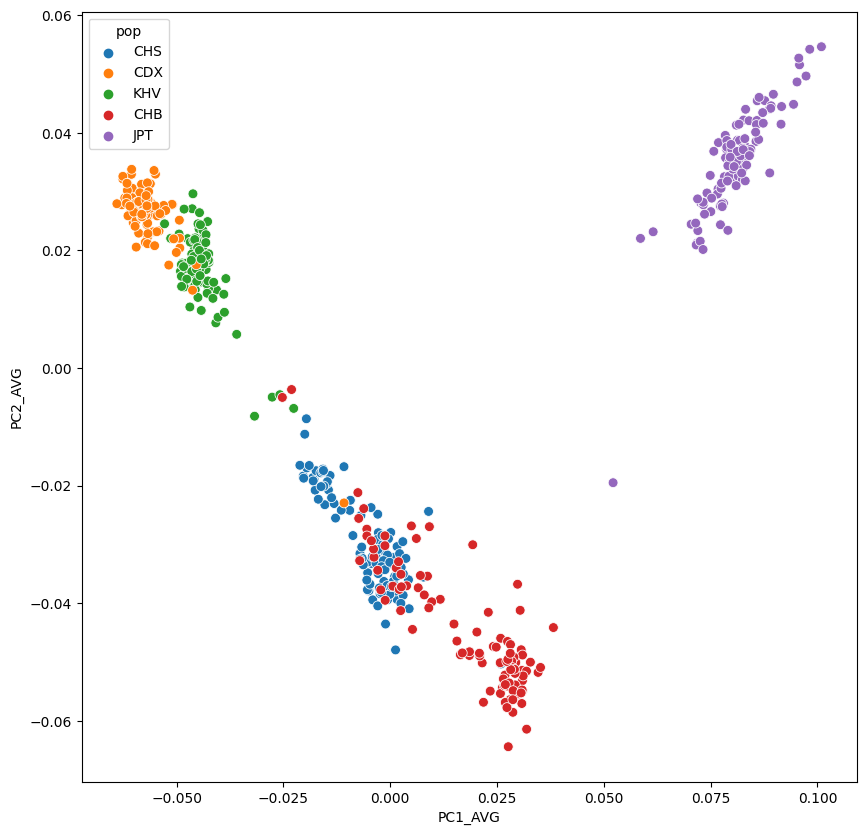

In [143]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=pcaped,x="PC1_AVG",y="PC2_AVG",hue="pop",s=50)